In [1]:
import numpy as np #lib para cálculos e funções em arrays multidimensionais
import pandas as pd #pandas - libpra manipulação e análise de dados de alta performance
import seaborn as sb #lib pra dar um upgrade na visualização do matplotlib
import matplotlib #lib para plotar gráficos
import matplotlib.pyplot as plt
sb.set_style('darkgrid') #definindo tema do seaborn (fundo mais escuro com grelhas)

font = {'family' : 'Arial', #definindo objeto para formatar a fonte
        'size'   : 16}

matplotlib.rc('font', **font) #aplicando a fonte padrão que queremos para o plot dos gráficos

## 1 - Importanto datasets pré-tratado ##

In [2]:
#Carregando o dataset de população por idade por raça
cor_idade_melt = pd.read_csv('cor-idade-melt-tratado.csv', sep=',')

#Removendo a coluna de índice
cor_idade_melt = cor_idade_melt.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - Cor / Idade / Mortalidade')
display(cor_idade_melt)


Tabela Pré-Tratada - Cor / Idade / Mortalidade


,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil
0,Branca,14297,0-4a,18.0,444168,4.052521
1,Preta,2108,0-4a,0.0,29954,0.000000
2,Amarela,544,0-4a,0.0,8329,0.000000
3,Parda,5367,0-4a,17.0,227650,7.467604
4,Indígena,16,0-4a,1.0,813,123.001230
5,Total,23088,0-4a,38.0,710927,5.345134
6,Branca,14297,5-9a,8.0,433860,1.843913
7,Preta,2108,5-9a,1.0,39476,2.533185
8,Amarela,544,5-9a,0.0,9020,0.000000
9,Parda,5367,5-9a,5.0,275068,1.817732


## 2 - Feature Engineering ##

In [3]:
#Convertendo as colunas COR e "Obitos por 100 mil" para um array bidimensional para poder encontrar o número de mortes esperadas
pop_padrao = cor_idade_melt[cor_idade_melt['Cor'] == 'Total']['Óbitos por 100 mil'].to_numpy()
display(pop_padrao)

array([5.34513389e+00, 1.84628613e+00, 1.61396309e+00, 4.27422984e+00,
       8.16813038e+00, 9.86429154e+00, 2.37605883e+01, 4.26473302e+01,
       6.64223799e+01, 9.42481689e+01, 1.62807905e+02, 2.78774632e+02,
       5.09626408e+02, 8.63602987e+02, 1.20395616e+03, 6.25435020e+03])

In [4]:
#Criando a coluna 'ESPERADOS' multiplicando o número de HAB pelo array de população padrão
cor_idade_melt['Esperados'] = cor_idade_melt['Habitantes'] * np.repeat(pop_padrao, 6) / 100000
display(cor_idade_melt)

,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
0,Branca,14297,0-4a,18.0,444168,4.052521,23.741374
1,Preta,2108,0-4a,0.0,29954,0.000000,1.601081
2,Amarela,544,0-4a,0.0,8329,0.000000,0.445196
3,Parda,5367,0-4a,17.0,227650,7.467604,12.168197
4,Indígena,16,0-4a,1.0,813,123.001230,0.043456
5,Total,23088,0-4a,38.0,710927,5.345134,38.000000
6,Branca,14297,5-9a,8.0,433860,1.843913,8.010297
7,Preta,2108,5-9a,1.0,39476,2.533185,0.728840
8,Amarela,544,5-9a,0.0,9020,0.000000,0.166535
9,Parda,5367,5-9a,5.0,275068,1.817732,5.078542


In [5]:
#Agrupando as cores (automaticamente eliminando as faixas etárias)
resultado = cor_idade_melt.groupby('Cor').sum()
display(resultado)

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
Cor,,,,,
Amarela,8704,544.0,237227,6108.128627,939.682520
Branca,228752,14294.0,6663579,8537.366372,16323.595784
Indígena,256,16.0,12807,6805.075625,22.168593
Parda,85872,5365.0,3408685,11150.797546,4424.304804
Preta,33728,2106.0,726417,13934.477936,1369.892213
Total,369408,23080.0,11049028,9531.308795,23080.000000


In [6]:
#removendo a linha TOTAL
resultado = resultado.drop('Total')
display(resultado)

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
Cor,,,,,
Amarela,8704,544.0,237227,6108.128627,939.682520
Branca,228752,14294.0,6663579,8537.366372,16323.595784
Indígena,256,16.0,12807,6805.075625,22.168593
Parda,85872,5365.0,3408685,11150.797546,4424.304804
Preta,33728,2106.0,726417,13934.477936,1369.892213


In [7]:
#transformando a coluna COR em índice para aplicar o melt (transformar colunas em linhas)
resultado['Cor'] = resultado.index
display(resultado)

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados,Cor
Cor,,,,,,
Amarela,8704,544.0,237227,6108.128627,939.682520,Amarela
Branca,228752,14294.0,6663579,8537.366372,16323.595784,Branca
Indígena,256,16.0,12807,6805.075625,22.168593,Indígena
Parda,85872,5365.0,3408685,11150.797546,4424.304804,Parda
Preta,33728,2106.0,726417,13934.477936,1369.892213,Preta


In [8]:
#Transformando as colunas Óbitos e Esperandos em linhas da nova coluna (Tipo)
resultado_melt = resultado.melt(id_vars=['Cor'], value_vars=['Óbitos', 'Esperados'], 
                                var_name='Tipo', value_name='Óbitos' )

display(resultado_melt)

,Cor,Tipo,Óbitos
0,Amarela,Óbitos,544.000000
1,Branca,Óbitos,14294.000000
2,Indígena,Óbitos,16.000000
3,Parda,Óbitos,5365.000000
4,Preta,Óbitos,2106.000000
5,Amarela,Esperados,939.682520
6,Branca,Esperados,16323.595784
7,Indígena,Esperados,22.168593
8,Parda,Esperados,4424.304804
9,Preta,Esperados,1369.892213


In [11]:
resultado_melt.to_csv("cor-obitos-esperados-2020.csv")

## 3 - Calculando a Diferença e Plotando o Gráfico ##

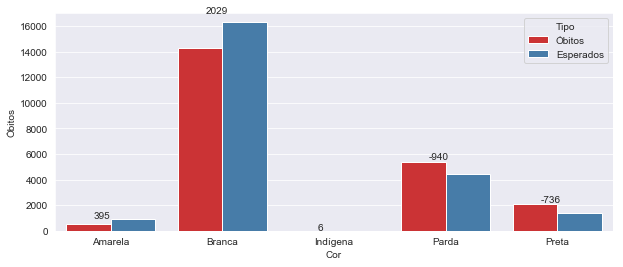

In [9]:
fig, axs = plt.subplots(figsize=(10, 4))
sb.barplot(data=resultado_melt, x='Cor', hue='Tipo', y='Óbitos', ax=axs, palette='Set1')

diff = (resultado['Esperados'] - resultado['Óbitos'] ).to_numpy() 
for k, d in enumerate(diff):
  altura = max(resultado['Esperados'].iloc[k], resultado['Óbitos'].iloc[k])
  plt.text(k-0.15, altura*1.04, str(int(d)) )

plt.ylim(0, 17000)
plt.show()

Text(0, 0.5, 'Óbitos por cor por 100 mil habitantes')

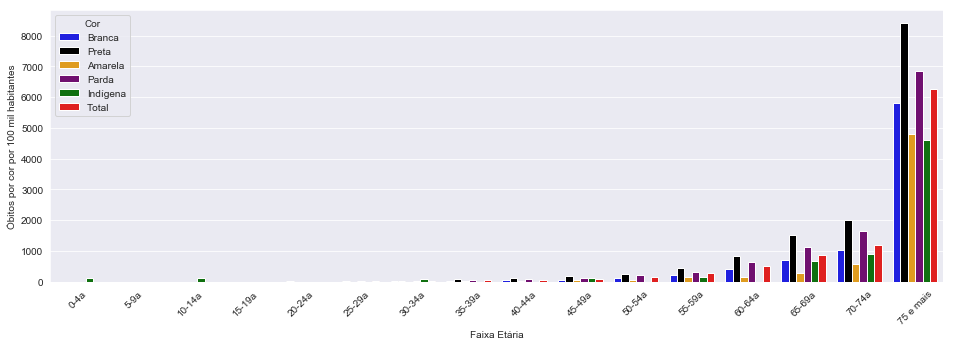

In [10]:
colors = ['blue', 'black', 'orange', 'purple', 'green','red']
fig, axs = plt.subplots(figsize=(16, 5))
sb.barplot(data = cor_idade_melt, x='Faixa Etária', hue='Cor', 
            y='Óbitos por 100 mil', ax=axs, palette=sb.color_palette(colors) )
plt.xticks(rotation=45) 
plt.ylabel('Óbitos por cor por 100 mil habitantes')